**Image Augmentation using Pytorch and Albumentations**
---
**Data Augmentation** : Data augmentation is a technique used to increase the amount of data that a machine learning model can consume. It works by taking advantage of existing data sets and creating new synthetic data.

Reason for Augmentation
* Not enought dataset size.
* Improve the performance of the Models.


**Image Augmentation Techniques**
---

![](https://camo.githubusercontent.com/3bb6e4bb500d96ad7bb4e4047af22a63ddf3242a894adf55ebffd3e184e4d113/68747470733a2f2f686162726173746f726167652e6f72672f776562742f62642f6e652f72762f62646e6572763563746b75646d73617a6e687734637273646669772e6a706567)


**Dataset Download: [Caltech](http://www.vision.caltech.edu/Image_Datasets/Caltech256/)**
---
![](http://www.vision.caltech.edu/Image_Datasets/Caltech256/intro_tight_crop.jpg)


**1.Load Modules**
---

In [13]:
# torch loaded...!!!
import torch
import torchvision
import torchvision.transforms as transforms

# other module load...!!!
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import wget
import albumentations as A
import random

from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm

The following are some of the important modules in the above code block.

* `torchvision`.transforms: to apply image augmentation and transforms using PyTorch.
* `glob`: it will help us to make a list of all the images in the dataset.
* `matplotlib`: to plot the images.
* `albumentations`: to apply image augmentation using albumentations library.
* `DataLoader` and Dataset: for making our custom image dataset class and iterable data loaders.
* `PIL`: to easily convert an image to RGB format.

**2.Download dataset Caltech**
---

In [14]:
# filename = wget.download("http://www.vision.caltech.edu/Image_Datasets/Caltech256/256_ObjectCategories.tar")
# !curl --header "Host: doc-0c-3s-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header "Referer: https://drive.google.com/" --header "Cookie: AUTH_6vlvivclubqqutb47g74o31g58sni92n_nonce=t5udktiuo4nfc" --header "Connection: keep-alive" "https://doc-0c-3s-docs.googleusercontent.com/docs/securesc/0il5o2uucjtpr32lq0kaonohhjbb3ku7/c5758bqb3t50gri6iqsslaei72ocr4cn/1605754350000/15424859768005087218/16116444459058408221/1r6o0pSROcV1_VwT4oSjA2FBUSCWGuxLK?e=download&authuser=0&nonce=t5udktiuo4nfc&user=16116444459058408221&hash=gvij410prv1g4qemb9rvq0k34o2mu9qb" -L -o '256_ObjectCategories.tar'

**3.Making List of All Images**
---

In [15]:
import os
classes = os.listdir("256_ObjectCategories/256_ObjectCategories/")[:5]
print(classes)


['001.ak47', '002.american-flag', '003.backpack', '004.baseball-bat', '005.baseball-glove']


In [16]:
images = glob.glob(f"256_ObjectCategories/256_ObjectCategories/251.airplanes-101/*.jpg") 

# for i in tqdm(classes):
#     image_list = glob.glob(f"256_ObjectCategories/256_ObjectCategories/{i}/*.jpg")
#     for j in image_list:
#         images.append(j)

print(f"Total Images in Caltech256 Dataset : {len(images)}")

# helping function
def visualize(image, title = "Original Image"):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.axis("off")
    plt.title(title)
    plt.show()

Total Images in Caltech256 Dataset : 800


**4. Read the Image and Convert into BGR to RGB**
---
* OpenCV reads an image in BGR format (so color channels of the image have the following order: Blue, Green, Red). Albumentations uses the most common and popular RGB image format. So when using OpenCV, we need to convert the image format to RGB explicitly.

(184, 401, 3)


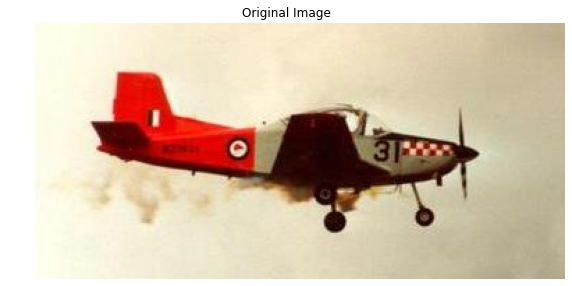

In [17]:
image = cv2.imread(images[1])
random.seed(42) 
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

**5.Define Single Image Augmentation**
---

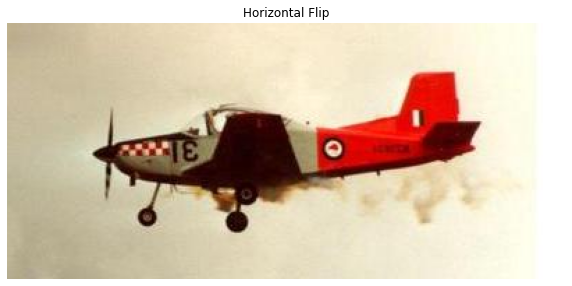

In [21]:
transform = A.HorizontalFlip(p=0.5)
# random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image, title = "Horizontal Flip")

**6. Verticle Flip**
---

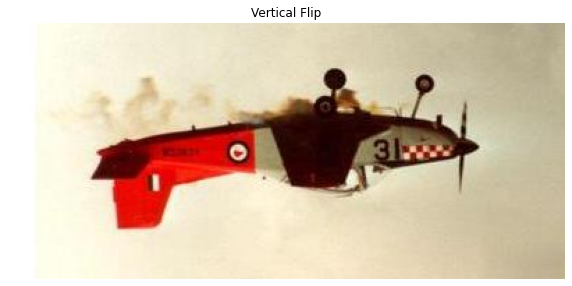

In [22]:
transform = A.VerticalFlip(p=0.5)
# random.seed(42) 
augimg1 = transform(image=image)['image']
visualize(augimg1, title = "Vertical Flip")

**7. ShiftScaleRotation**
---

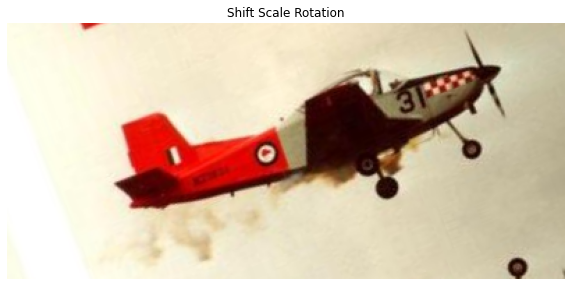

In [23]:
trans_ssr = A.ShiftScaleRotate(p=0.6)
# random.seed(42) 
aug_ssr = trans_ssr(image=image)['image']
visualize(aug_ssr, title="Shift Scale Rotation")

**8. Now Combine Operation Pipeline using `Compose`.**
---

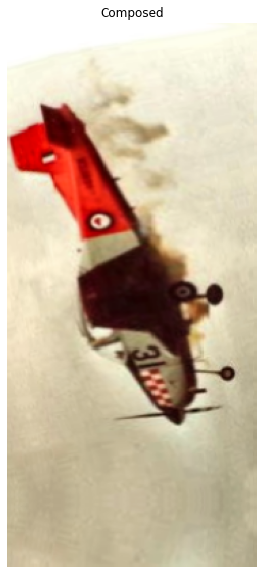

In [24]:
transform = A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue(),
])
# random.seed(42) 
augimg2 = transform(image=image)['image']
visualize(augimg2, title="Composed")

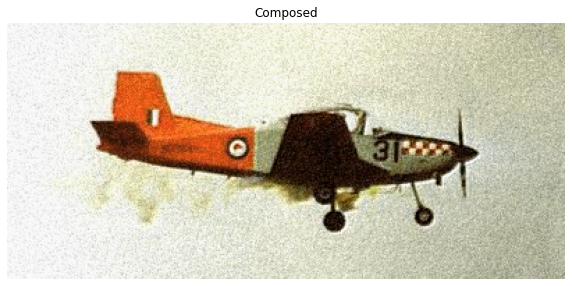

In [25]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),
            A.GaussNoise(),
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])
# random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image, title="Composed")